In [ ]:
#software informatico
#Materia:Metodos Numericos
#Docente:MM.Jorge Pool Cen
#unidad 5
#Sistemas computacionales 4-A
#Integrantes del equipo:
#Dzul Noh Jose Julio
#Llanes Barrera Luis Angel
#Poot Pool Riger Emmanuel

Resolver los siguientes ejercicios con los métodos de Lagrange y de Newton. Pueden apoyarse de cóódigos de programación para estimar las primeras diferencias. En caso de que en los ejercicio no proporcione la función de procedencia de los datos, se sugiere hacer una gráfica solamente de las estimaciones. (basarse en el ejemplo de arriba y colocar el titulo, sólo será una línea).

+ Solo Lagrange. Modelar la siguiente tabla de observaciones de puntos(tiempo) y velocidad.

indice|tiempo  |velocidad 
------|-------------------|------------------
0|1       |800
1|3       | 2310
2|5       | 3090
3|7       |3940
4|13      |4755


Con el polinomio estime la velocida cuando t=10.

  + Utilice Lagrange de grado 1, utilizando los puntos 3 y 4 dado que 10 se encuentra entre 7 y 13.
  + Utilice Lagrange de grado 2, utilizando los puntos 2,3,4.

Polinomio 25*(x - 13)*(x - 7)*(x - 5)*(x - 3)/18 - 231*(x - 13)*(x - 7)*(x - 5)*(x - 1)/16 + 1545*(x - 13)*(x - 7)*(x - 3)*(x - 1)/64 - 985*(x - 13)*(x - 5)*(x - 3)*(x - 1)/72 + 317*(x - 7)*(x - 5)*(x - 3)*(x - 1)/384

polinomio simple -677*x**4/384 + 359*x**3/8 - 75431*x**2/192 + 14509*x/8 - 84975/128

Primer grado con evaluacion de T = 10 4347.5 Segundo grado con evaluacion de T = 10 4672.8125


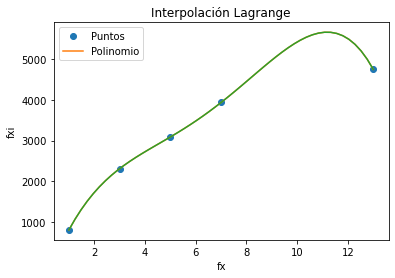

In [3]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

#Ingreso de datos
fx = np.array([1, 3, 5, 7, 13])               #5, 7, 13
fxi = np.array([800, 2310, 3090, 3940, 4755]) #3090, 3940, 4755


#Primer grado
a0 = (fxi[3]/ (fx[3] - fx[4]))
a1 = (fxi[4]/ (fx[4] - fx [3]))
t = 10
p1 = a0 * (t-fx[4]) + a1 * (t-fx[3])

#Segundo grado
A0 = (fxi[2]/((fx[2]-fx[3]) * (fx[2]-fx[4])))
A1 = (fxi[3]/((fx[3]-fx[2]) * (fx[3]-fx[4])))
A2 = (fxi[4]/((fx[4]-fx[2]) * (fx[4]-fx[3])))

p2 = A0 * ((t-fx[3]) * (t - fx[4])) + A1 * ((t-fx[2]) * (t - fx[4])) + A2 * ((t-fx[2]) * (t - fx[3]))

#procedimiento
n = len(fx)
x = sym.Symbol('x')
poli = 0
i = 0
for i in range(0,n,1):
    num = 1
    den = 1
    for j in range(0,n,1):
        if (i != j):
            num = num * (x - fx[j])
            den = den * (fx[i] - fx[j])
        termino = (num/den) * fxi[i]
    poli = poli + termino
polisimple = sym.expand(poli)

px = sym.lambdify(x, poli)

muestras = 51
a = np.min(fx)
b = np.max(fx)
p_fx = np.linspace(a, b, muestras)
p_fxi = px(p_fx)

print("Polinomio", poli)
print()
print("polinomio simple", polisimple)
print()
print("Primer grado con evaluacion de T = 10", p1, "Segundo grado con evaluacion de T = 10", p2)

#grafica
#plt.plot(fx, fxi, 'o')
plt.plot(fx,fxi,'o', label = 'Puntos')
plt.plot(p_fx,p_fxi, label = 'Polinomio')
plt.legend()
plt.plot(p_fx, p_fxi)
plt.xlabel('fx')
plt.ylabel('fxi')
plt.title('Interpolación Lagrange')
plt.show()


+ Ejercicio 2 (Solo Newton). Ajuste un polinomio de interpolación de Newton de orden 6 con los siguientes puntos.

indice|tiempo  |velocidad 
------|-------------------|------------------
0|1.6       |2
1|2       | 8
2|2.5       |14
3|3.2       |15
4|4     |8
5|4.5 | 2

  

Tabla Diferencia Dividida
[['i   ', 'xi  ', 'fi  ', 'F[1]', 'F[2]', 'F[3]', 'F[4]', 'F[5]', 'F[6]']]
[[  0.       1.6      2.      15.      -3.3333  -3.4226   1.8477  -0.4812
    0.    ]
 [  1.       2.       8.      12.      -8.8095   1.0119   0.4524   0.
    0.    ]
 [  2.       2.5     14.       1.4286  -6.7857   2.1429   0.       0.
    0.    ]
 [  3.       3.2     15.      -8.75    -2.5      0.       0.       0.
    0.    ]
 [  4.       4.       8.     -12.       0.       0.       0.       0.
    0.    ]
 [  5.       4.5      2.       0.       0.       0.       0.       0.
    0.    ]]
dDividida: 
[15.     -3.3333 -3.4226  1.8477 -0.4812  0.    ]
polinomio: 
15.0*x - 0.481150793650793*(x - 4.0)*(x - 3.2)*(x - 2.5)*(x - 2.0)*(x - 1.6) + 1.84771825396825*(x - 3.2)*(x - 2.5)*(x - 2.0)*(x - 1.6) - 3.42261904761904*(x - 2.5)*(x - 2.0)*(x - 1.6) - 3.33333333333334*(x - 2.0)*(x - 1.6) - 22.0
polinomio simplificado: 
-0.481150793650793*x**5 + 8.2470238095238*x**4 - 53.7673115079364*x**3 +

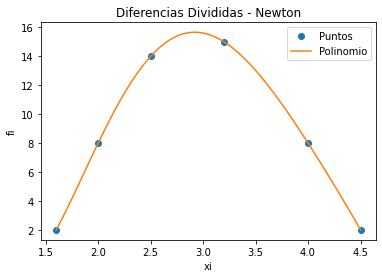

In [4]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

# INGRESO , Datos de prueba
xi = np.array([1.6, 2, 2.5, 3.2, 4, 4.5])
fi = np.array([2, 8, 14, 15, 8, 2])

# PROCEDIMIENTO

# Tabla de Diferencias Divididas Avanzadas
titulo = ['i   ','xi  ','fi  ']
n = len(xi)
ki = np.arange(0,n,1)
tabla = np.concatenate(([ki],[xi],[fi]),axis=0)
tabla = np.transpose(tabla)

# diferencias divididas vacia
dfinita = np.zeros(shape=(n,n),dtype=float)
tabla = np.concatenate((tabla,dfinita), axis=1)

# Calcula tabla, inicia en columna 3
[n,m] = np.shape(tabla)
diagonal = n-1
j = 3
while (j < m):
    # Añade título para cada columna
    titulo.append('F['+str(j-2)+']')

    # cada fila de columna
    i = 0
    paso = j-2 # inicia en 1
    while (i < diagonal):
        denominador = (xi[i+paso]-xi[i])
        numerador = tabla[i+1,j-1]-tabla[i,j-1]
        tabla[i,j] = numerador/denominador
        i = i+1
    diagonal = diagonal - 1
    j = j+1

# POLINOMIO con diferencias Divididas
# caso: puntos equidistantes en eje x
dDividida = tabla[0,3:]
n = len(dfinita)

# expresión del polinomio con Sympy
x = sym.Symbol('x')
polinomio = fi[0]
for j in range(1,n,1):
    factor = dDividida[j-1]
    termino = 1
    for k in range(0,j,1):
        termino = termino*(x-xi[k])
    polinomio = polinomio + termino*factor

# simplifica multiplicando entre (x-xi)
polisimple = polinomio.expand()

# polinomio para evaluacion numérica
px = sym.lambdify(x,polisimple)

# Puntos para la gráfica
muestras = 101
a = np.min(xi)
b = np.max(xi)
pxi = np.linspace(a,b,muestras)
pfi = px(pxi)

# SALIDA
np.set_printoptions(precision = 4)
print('Tabla Diferencia Dividida')
print([titulo])
print(tabla)
print('dDividida: ')
print(dDividida)
print('polinomio: ')
print(polinomio)
print('polinomio simplificado: ' )
print(polisimple)

# Gráfica
plt.plot(xi,fi,'o', label = 'Puntos')
##for i in range(0,n,1):
##    plt.axvline(xi[i],ls='--', color='yellow')
plt.plot(pxi,pfi, label = 'Polinomio')
plt.legend()
plt.xlabel('xi')
plt.ylabel('fi')
plt.title('Diferencias Divididas - Newton')
plt.show()